# unity dissection

In [1]:
import sys

In [2]:
def load_modules():
    sys.path.append("../../../")
    %run ../../../ds/unity/npz/gen.py
    %run ../../../ac/math/angles.py
    %run ../../../ac/visualizer/plotter.py

In [4]:
load_modules()
np.set_printoptions(suppress=True)

Using TensorFlow backend.


# resources

In [5]:
npz_path="/home/chy/archive-data/processed/unity-class-shuffled-npz"
ugen = UnityEyePoseGenerator(npz_path, batch_size=50, is_item_mode=True)

*** meta verify complete [Unknown] ***


# unity visualize (방향 기억 보존)

<br>

### Note
- yaw: candide와 방향 반대
- yaw: 기본 180' 

In [25]:
def report(item: UnityItem):
    p, y, r = item.head_pose
    pn = p - 360 if p >= 180 else p
    yn = y - 180
    print("p {:0.2f}, y {:0.2f} / pyr ({:0.4f}, {:0.4f}, 0)".format(p, y, pn, yn))
    show_image(item.get_decoded_frame(), fig_size=(5,5))

# head pose (기본 단위 : degree)

<br>

### + 땅 / 오른쪽 / 없음
## raw 
### pitch : 정면 360 경계. 360 ~ (360-x) 하늘
### yaw   : 정면 180 경계. 160 왼쪽, 200 오른쪽 

## normalized
### pitch : p >= 180 ? p - 360 : p (-하늘봄 / +땅봄)
### yaw  : (yaw - 180) ==> (-왼쪽 / +오른쪽) 


In [14]:
items = ugen[0]

p 19.36, y 196.32 / pyr (19.3643, 16.3240, 0)


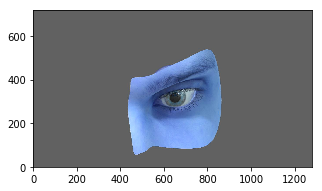

In [26]:
report(items[15])

p 320.96, y 183.64 / pyr (-39.0439, 3.6388, 0)


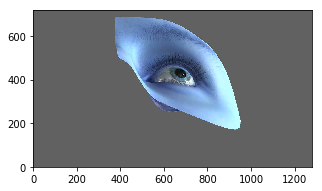

In [27]:
report(items[22])

p 0.80, y 160.76 / pyr (0.7951, -19.2418, 0)


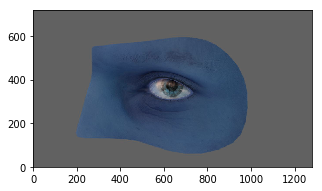

In [28]:
report(items[12])

p 351.23, y 198.79 / pyr (-8.7706, 18.7946, 0)


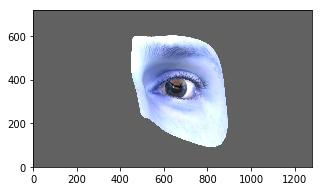

In [29]:
report(items[45])

# look vec

<br>

### 우 상
### x : +오른쪽 / 
### y : +위 /
### z : -카메라쪽 /

In [30]:
def lreport(item: UnityItem):
    lx, ly, lz = item.look_vec[0], item.look_vec[1], item.look_vec[2]
    print("opt ({:0.4f}, {:0.4f} {:0.4f}, 0)".format(lx, ly, lz))
    show_image(item.get_decoded_frame(), fig_size=(5,5))

opt (0.1268, -0.4257 -0.8959, 0)


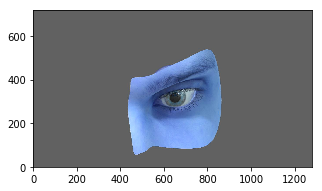

In [31]:
lreport(items[15])

opt (0.3652, 0.6879 -0.6272, 0)
opt (0.0717, 0.3706 -0.9260, 0)


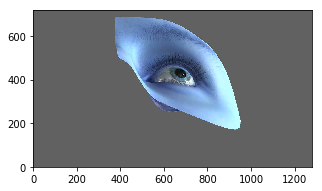

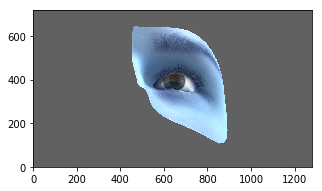

In [32]:
lreport(items[22])
lreport(items[2])

opt (0.1692, 0.0461 -0.9845, 0)


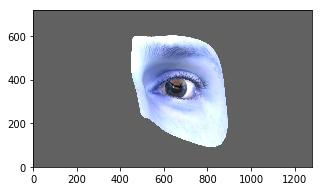

In [33]:
lreport(items[45])

opt (0.0349, -0.1975 -0.9797, 0)


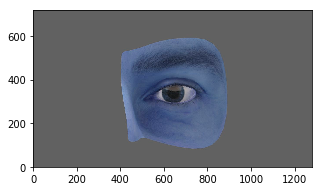

In [35]:
lreport(items[0])